Universidad del valle de Guatemala  
Dpto. Ciencias de la computacion  
Inteligencia Artificial  
Alberto Suriano  

Laboratorio 4  
Andres Quinto - 18288  
Marlon Hernández - 15177  
Javier Prado - 21486  
Luis Montenegro - 21699  
Gabriel Garcia - 21352  

- Link del repositorio: https://github.com/AndresQuinto5/IA_LAB4.git

# Task 1 - Preguntas Teóricas

1. **Explique con sus propias palabras, qué son los grafos computaciones y cuál es su importancia para el cálculo de gradientes en aplicaciones como backpropagation**  

Un grafo computacional es una forma de representar y modelar cualquier tipo de problemas con data muy extensa, en el cual esta formado por vertices y aristas. Para entrenar una red neural con gradiente descendiente, es nesesario los gradientes relevantes por cada peso, la derivada de la perdida respecto al peso de cada capa de la red neural. Los grafos computacionales son esenciales para calcular gradientes en el entrenamiento de redes neuronales como backpropagation. Estos grafos organizan las operaciones y conexiones en la red, facilitando el cálculo eficiente de cómo cambia la función de pérdida con respecto a cada peso. Esto hace que el proceso de entrenamiento sea más rápido y preciso. (Calculus On Computational Graphs: Backpropagation -- Colah’s Blog, s. f.)

2. **Detalle cuales son los componentes y pasos que conforman una red neuronal. Con esto en mente, ¿cómo mejoraría el perceptrón que hizo en el laboratorio pasado?**  

Los componentes y pasos que conforman una red neuronal son los siguientes:

- **Neuronas o nodos**: Son las unidades básicas de una red neuronal. Cada neurona toma un conjunto de entradas, realiza cálculos sobre ellas y produce una salida.
- **Conexiones y pesos**: Cada conexión entre neuronas tiene un peso asociado, que determina la importancia de esa conexión. Los pesos se ajustan durante el proceso de aprendizaje.
- **Función de activación**: Determina la salida de una neurona en función de sus entradas. Existen varias funciones de activación, como la función sigmoide, la tangente hiperbólica y la función de paso.
- **Capas**: Las redes neuronales se organizan en capas. Hay una capa de entrada que recibe los datos, una o más capas ocultas donde se realizan los cálculos, y una capa de salida que produce el resultado final.
- **Proceso de aprendizaje**: Durante el proceso de aprendizaje, los pesos de las conexiones se ajustan para minimizar la diferencia entre la salida producida por la red y la salida deseada.  
[Perceptron, ML](https://ciberseguridad.com/guias/nuevas-tecnologias/machine-learning/perceptron/)  

Para mejorar el perceptron que hicimos en el laboratorio anterior, donde unicamente implementamos el perceptron de forma muy trivial podriamos:  

- **Aumentar la complejidad**: Nuestro perceptrón era demasiado simple para capturar la complejidad de los datos (aunque los datos tambien eran simples, pero asumiendo que utilizariamos nuev data), deberiamos agregar más neuronas o capas a la red.
- **Ajustar los parámetros**: Experimentar con diferentes valores para los parámetros de aprendizaje, como la tasa de aprendizaje o el número de épocas.
- **Preprocesamiento de datos**: Mejorar la calidad de los datos mediante técnicas de preprocesamiento, como la normalización o la eliminación de valores atípicos. (asumiendo que tendriamos nueva data y no un conjunto ya realizado)
- **Función de activación**: Experimentar con diferentes funciones de activación para ver si alguna de ellas mejora el rendimiento del perceptrón.

3. **Investigue y explique cómo se selecciona el valor K usando el método de la silueta para el algoritmo de K-Means. Explique las fórmulas (ecuaciones) que lo componen así como las asumpciones, si hay.**

El algoritmo de K-means busca minimizar la suma de las distancias cuadráticas de cada objeto al centroide de su cluster. Los objetos se representan con vectores reales de d dimensiones x1,x2,…,xn y el algoritmo k-means construye grupos donde se minimiza la suma de distancias de los objetos, dentro de cada grupo S={S1,S2,…,}, a su centro

<img src="ecuacion1.jpg"/>

donde  S  es el conjunto de datos cuyos elementos son los objeto  x   representados por vectores, donde cada uno de sus elementos representa una característica o atributo. Tendremos K grupos o clusters con su correspondiente centroide μi.  

(El Algoritmo K-means Aplicado A Clasificación y Procesamiento de imagenes, s. f.)

4. **Investigue sobre Principal Component Analysis (PCA) y responda respecto a algoritmos como K-Means: a. ¿Cómo podría ayudarle a mejorar la calidad de sus clusters cuando se usa K-Means?**  
El PCA  es un método estadístico versátil para reducir una tabla de datos de casos por variables a sus características esenciales, llamadas componentes principales. (Greenacre etal., 2022).
Dado que PCA es una tecnica estadística ampliamente utilizada para la reducción de dimensiones nos ayuda a mejorar nuestros resultados de segmentación, haciendo que mejore el rendimiento de nuestro algoritmo, manteniendo la linealidad de los datos y reduciendo las dimensiones.  (Kaloyanova, 2021)

Referencias:
- Calculus on Computational Graphs: Backpropagation -- colah’s blog. (s. f.). https://colah.github.io/posts/2015-08-Backprop/
- Jesús. (2022, 27 abril). Componentes de una red neuronal. DataSmarts. https://www.datasmarts.net/componentes-de-una-red-neuronal/
- Greenacre, M., Groenen, P. J. F., Hastie, T., D’Enza, A. I., Markos, A., & Tuzhilina, E. (2022). Principal component analysis. Nature Reviews Methods Primers, 2(1). https://doi.org/10.1038/s43586-022-00184-w
https://365datascience.com/tutorials/python-tutorials/
- El algoritmo k-means aplicado a clasificación y procesamiento de imágenes. (s. f.). unioviedo.es. Recuperado 10 de febrero de 2024, de https://www.unioviedo.es/compnum/laboratorios_py/kmeans/kmeans.html pca-k-means/

## Analisis exploratorio

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt
from tqdm import tqdm

from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

df = pd.read_csv('bank_transactions.csv')
df


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [2]:
df.dropna(inplace=True)
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [3]:
df['CustGender'].unique()

array(['F', 'M', 'T'], dtype=object)

Nota: por alguna razon hay un valor T, en la columna de generos, aun siendo mas extraño de que solo haya una persona con este valor, por lo que se toma la decision de eliminar este row.

In [4]:
df.drop(df[df['CustGender']=='T'].index,inplace=True)

In [5]:
print(df.dtypes)


TransactionID               object
CustomerID                  object
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime              int64
TransactionAmount (INR)    float64
dtype: object


CustomerDOB y TransactionDate deberian estar en formato de fechas y no de object

In [6]:
#countCustGender

df['CustGender'].value_counts()


CustGender
M    760978
F    280635
Name: count, dtype: int64

In [7]:
# Convert the 'CustomerDOB' column to datetime format
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])

# Convert the 'TransactionDate' column to datetime format
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])


C:\Users\aeqv2\AppData\Local\Temp\ipykernel_21692\3763677705.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])
C:\Users\aeqv2\AppData\Local\Temp\ipykernel_21692\3763677705.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])


Con la información que tenemos podemos determinar la edad de las personas debido a las fechas de la transaccion y de nacimiento.

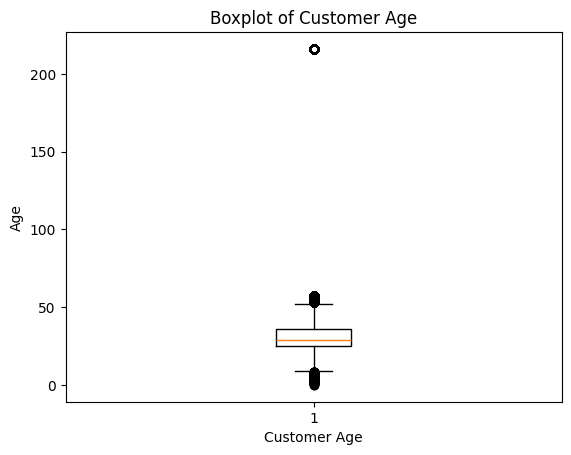

In [8]:
# calculate customer age based on the data time
df['CustomerAge'] = (df['TransactionDate'].dt.year - df['CustomerDOB'].dt.year)
df['CustomerAge'].value_counts()

# Apply absolute value to all values in 'CustomerAge' column
df['CustomerAge'] = df['CustomerAge'].abs()

import matplotlib.pyplot as plt

plt.boxplot(df['CustomerAge'])
plt.xlabel('Customer Age')
plt.ylabel('Age')
plt.title('Boxplot of Customer Age')
plt.show()



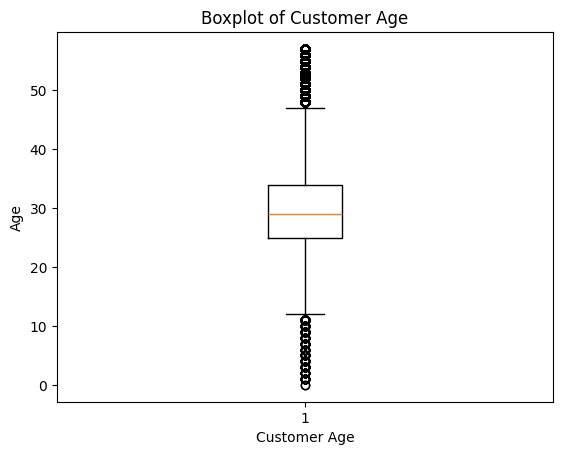

In [9]:
# Drop rows where age is above 100
df = df.drop(df[df['CustomerAge'] > 100].index)

import matplotlib.pyplot as plt

plt.boxplot(df['CustomerAge'])
plt.xlabel('Customer Age')
plt.ylabel('Age')
plt.title('Boxplot of Customer Age')
plt.show()

# Deletes the features that we don't need
df.drop(columns=['TransactionID', 'CustomerDOB', 'TransactionTime'], axis=1, inplace=True)

In [10]:
from sklearn.preprocessing import LabelEncoder

def encode_categorical_features(df):
    """
    Encodes the categorical features 'CustGender' and 'CustLocation' using LabelEncoder.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing the categorical features.

    Returns:
    pandas.DataFrame: The DataFrame with the encoded features.
    """
    # Create an instance of LabelEncoder
    encoder = LabelEncoder()
    # Encode the "CustGender" feature
    df['CustGender_encoded'] = encoder.fit_transform(df['CustGender'])
    # Encode the "CustLocation" feature (assuming it is present in the DataFrame)

    df['CustLocation_encoded'] = encoder.fit_transform(df['CustLocation'])

    return df

df = encode_categorical_features(df)
df.drop (columns=['CustGender' , 'CustLocation'] , axis=1 , inplace = True)
df

,CustomerID,CustAccountBalance,TransactionDate,TransactionAmount (INR),CustomerAge,CustGender_encoded,CustLocation_encoded
0,C5841053,17819.05,2016-02-08,25.0,22,0,3117
1,C2142763,2270.69,2016-02-08,27999.0,41,1,3174
2,C4417068,17874.44,2016-02-08,459.0,20,0,4625
3,C5342380,866503.21,2016-02-08,2060.0,57,0,4625
4,C9031234,6714.43,2016-02-08,1762.5,28,0,4965
...,...,...,...,...,...,...,...
1048562,C8020229,7635.19,2016-09-18,799.0,26,1,5066
1048563,C6459278,27311.42,2016-09-18,460.0,24,1,4943
1048564,C6412354,221757.06,2016-09-18,770.0,27,1,2954
1048565,C6420483,10117.87,2016-09-18,1000.0,38,1,7979


En la función `encode_categorical_features`, se utiliza la clase `LabelEncoder` del módulo `sklearn.preprocessing` para codificar las características categóricas "CustGender" y "CustLocation" en el DataFrame de entrada.

Primero, se crea una instancia del `LabelEncoder` utilizando la siguiente línea de código: $$ encoder = LabelEncoder() $$





Luego, se aplica la codificación a la característica "CustGender" utilizando el método `fit_transform` del `encoder`: $$ df['CustGender_encoded'] = encoder.fit_transform(df['CustGender']) $$





Este método ajusta el `encoder` a los valores únicos presentes en la columna "CustGender" del DataFrame y luego transforma esos valores en números enteros codificados. Los valores codificados se asignan a una nueva columna llamada "CustGender_encoded" en el DataFrame.

A continuación, se aplica la misma codificación a la característica "CustLocation" utilizando el método `fit_transform` nuevamente: $$ df['CustLocation_encoded'] = encoder.fit_transform(df['CustLocation']) $$





Al igual que antes, el `encoder` se ajusta a los valores únicos presentes en la columna "CustLocation" y los transforma en números enteros codificados. Los valores codificados se asignan a una nueva columna llamada "CustLocation_encoded" en el DataFrame.

Es importante tener en cuenta que el método `fit_transform` se utiliza por separado para cada característica categórica. Esto se debe a que el `encoder` necesita ajustarse a los valores únicos de cada característica individualmente para garantizar una codificación coherente.

Finalmente, la función devuelve el DataFrame con las características codificadas:

$$ return df $$



De esta manera, la función `encode_categorical_features` codifica las características categóricas "CustGender" y "CustLocation" utilizando `LabelEncoder` y agrega las columnas codificadas al DataFrame original.

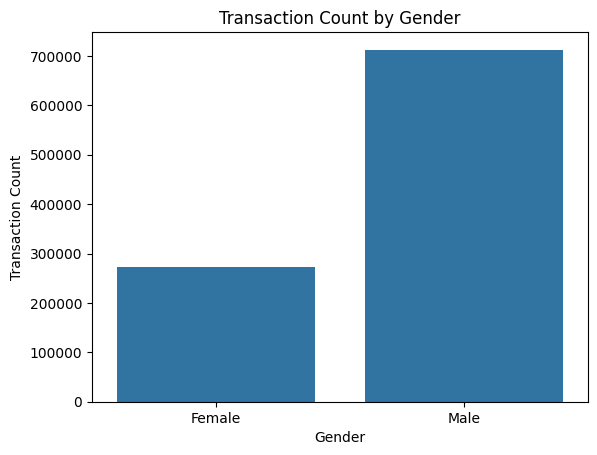

CustGender_encoded
1    712454
0    272868
Name: count, dtype: int64


In [11]:

"""
Plots the transaction count by gender.

Parameters:
df (pandas.DataFrame): The DataFrame containing the gender information.

Returns:
None
"""

gender_counts = df['CustGender_encoded'].value_counts()

# Plot transaction count by gender using seaborn
sns.countplot(data=df, x='CustGender_encoded')
plt.xlabel('Gender')
plt.ylabel('Transaction Count')
plt.xticks([0, 1], ['Female', 'Male'])
plt.title('Transaction Count by Gender')
plt.show()

print(gender_counts)


EL objetivo de este grafico es ver graficamente como se distribuyen las transacciones conforme a su genero, en este caso la mayoría son realizadas por hombres.

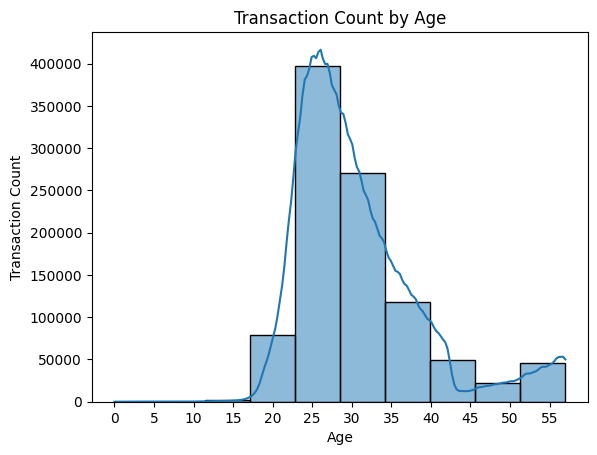

In [12]:

"""
Plots a histogram of transaction count by customer age.

Parameters:
- df: DataFrame containing the data
- x: Column name for the customer age
- bins: Number of bins for the histogram
- kde: Whether to plot a kernel density estimate
"""
sns.histplot(data=df, x='CustomerAge', bins=10, kde=True)
plt.xlabel('Age')
plt.ylabel('Transaction Count')
plt.title('Transaction Count by Age')
plt.xticks(range(0, 60, 5))
plt.show()


En esta distribucion similar a campana podemos apreciar que la media de las edades que realizan transacciones se encuentran en las edades de 23 a 35.

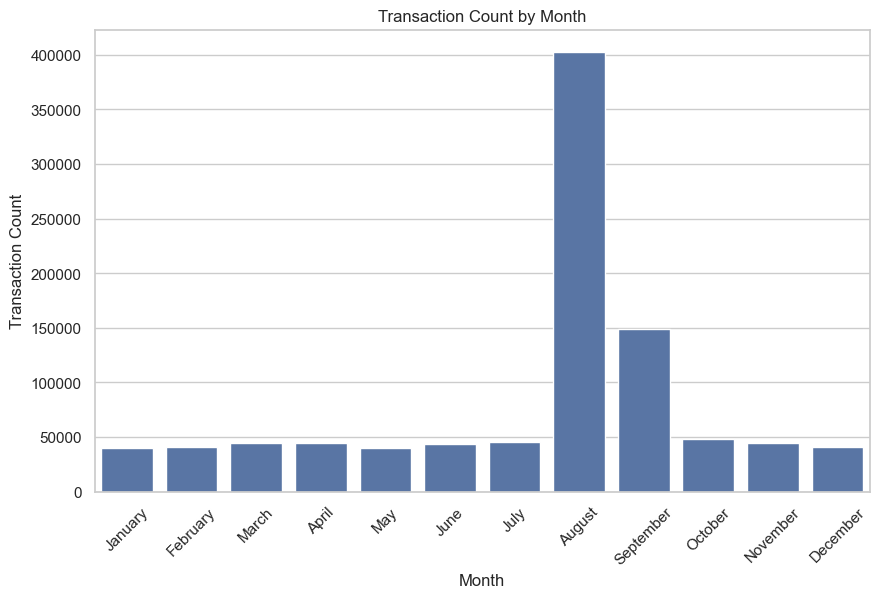

TransactionMonth
January       40232
February      41172
March         44376
April         44820
May           39914
June          43707
July          45926
August       402910
September    148810
October       48186
November      44769
December      40500
Name: count, dtype: int64


In [13]:

# Extract month from TransactionDate
df['TransactionMonth'] = df['TransactionDate'].dt.month

# Count transactions by month
transaction_counts = df['TransactionMonth'].value_counts().sort_index()

# Map month numbers to month names
transaction_counts.index = transaction_counts.index.map(lambda x: calendar.month_name[x])

# Set the style of the plot
sns.set(style="whitegrid")

# Plot transaction count by month using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=transaction_counts.index, y=transaction_counts.values)
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.title('Transaction Count by Month')
plt.xticks(rotation=45)
plt.show()

print(transaction_counts)


Nos parecio curioso que los meses con mayor movimiento de transacciones son los meses de agosto y septiembre, a lo cual encontramos estos datos en internet que podrian explicar el motivo: 

1. La mayor cantidad de transacciones se realizó en el mes de agosto. En agosto, India celebra el Día de la Independencia el 15 de agosto, que es una fiesta nacional. 
[Fiestas de India](https://directiatravel.com/viajes-india/guia/mejor-epoca-viajar/fiestas)  
2. En septiembre de 2016, se celebró el festival de Durga Puja, que es una de las festividades más importantes en varias partes de India. [DurgaPuja](https://issuu.com/indiandiplomacy/docs/india_perspectives_spanish_septembe)

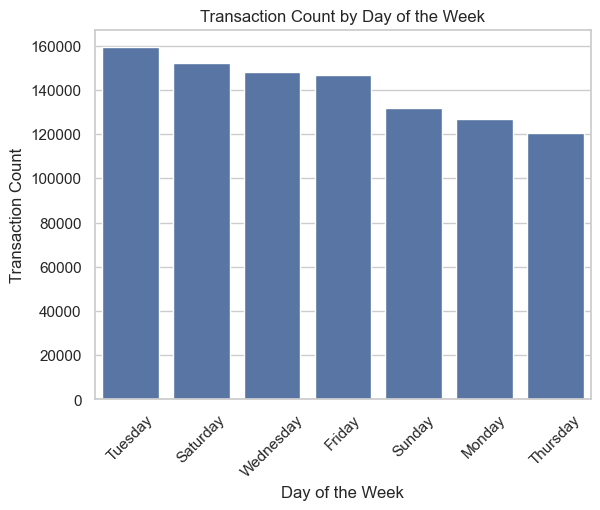

In [14]:
"""
Count transactions by day of the week and plot the transaction count using seaborn.

Parameters:
    df (pandas.DataFrame): The DataFrame containing the transaction data.

Returns:
    None
"""

# Count transactions by day of the week
transaction_counts = df['TransactionDate'].dt.day_name().value_counts().sort_values(ascending=False)

# Plot transaction count by day of the week using seaborn
sns.barplot(x=transaction_counts.index, y=transaction_counts.values, order=transaction_counts.index)
plt.xlabel('Day of the Week')
plt.ylabel('Transaction Count')
plt.title('Transaction Count by Day of the Week')
plt.xticks(rotation=45)
plt.show()


In [15]:
df.head()
df.drop('CustomerID', axis=1, inplace=True)

#### Realizamos una matriz de correlacion

In [16]:
df
correlation_matrix = df.corr()
correlation_matrix

,CustAccountBalance,TransactionDate,TransactionAmount (INR),CustomerAge,CustGender_encoded,CustLocation_encoded,TransactionMonth
CustAccountBalance,1.000000,0.002662,0.060988,0.088920,0.003487,0.004654,0.001901
TransactionDate,0.002662,1.000000,-0.002988,0.004463,0.001181,0.005953,0.996356
TransactionAmount (INR),0.060988,-0.002988,1.000000,0.094521,-0.014746,0.002837,-0.002765
CustomerAge,0.088920,0.004463,0.094521,1.000000,0.045841,0.006089,0.003142
CustGender_encoded,0.003487,0.001181,-0.014746,0.045841,1.000000,0.021235,0.001422
CustLocation_encoded,0.004654,0.005953,0.002837,0.006089,0.021235,1.000000,0.006231
TransactionMonth,0.001901,0.996356,-0.002765,0.003142,0.001422,0.006231,1.000000


### Pre procesamiento para modelos

In [17]:
df.head()

,CustAccountBalance,TransactionDate,TransactionAmount (INR),CustomerAge,CustGender_encoded,CustLocation_encoded,TransactionMonth
0,17819.05,2016-02-08,25.0,22,0,3117,2
1,2270.69,2016-02-08,27999.0,41,1,3174,2
2,17874.44,2016-02-08,459.0,20,0,4625,2
3,866503.21,2016-02-08,2060.0,57,0,4625,2
4,6714.43,2016-02-08,1762.5,28,0,4965,2


In [18]:
df = df.drop(columns=['TransactionDate', 'TransactionMonth'], axis=1)

In [19]:
df.head()

,CustAccountBalance,TransactionAmount (INR),CustomerAge,CustGender_encoded,CustLocation_encoded
0,17819.05,25.0,22,0,3117
1,2270.69,27999.0,41,1,3174
2,17874.44,459.0,20,0,4625
3,866503.21,2060.0,57,0,4625
4,6714.43,1762.5,28,0,4965


In [20]:
# numerical_features = ['CustAccountBalance', 'TransactionAmount (INR)']
# scaler = StandardScaler()
# df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Assuming 'CustomerAge' is a continuous feature that should be scaled
# and 'CustLocation_encoded' is a categorical feature with a large range that should be scaled.
numerical_features = ['CustAccountBalance', 'TransactionAmount (INR)', 'CustomerAge']
categorical_features_to_scale = ['CustLocation_encoded']  # if needed

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# # Optionally scale 'CustLocation_encoded' if it's determined necessary
# if categorical_features_to_scale:
#     df[categorical_features_to_scale] = scaler.fit_transform(df[categorical_features_to_scale])

df.head()


,CustAccountBalance,TransactionAmount (INR),CustomerAge,CustGender_encoded,CustLocation_encoded
0,-0.107888,-0.232489,-1.078689,0,3117
1,-0.126898,4.323714,1.265929,1,3174
2,-0.107820,-0.161802,-1.325491,0,4625
3,0.929744,0.098957,3.240344,0,4625
4,-0.121465,0.050503,-0.338284,0,4965


In [21]:
df.head()

,CustAccountBalance,TransactionAmount (INR),CustomerAge,CustGender_encoded,CustLocation_encoded
0,-0.107888,-0.232489,-1.078689,0,3117
1,-0.126898,4.323714,1.265929,1,3174
2,-0.107820,-0.161802,-1.325491,0,4625
3,0.929744,0.098957,3.240344,0,4625
4,-0.121465,0.050503,-0.338284,0,4965


In [23]:
df.head()

,CustAccountBalance,TransactionAmount (INR),CustomerAge,CustGender_encoded,CustLocation_encoded
0,-0.107888,-0.232489,-1.078689,0,3117
1,-0.126898,4.323714,1.265929,1,3174
2,-0.107820,-0.161802,-1.325491,0,4625
3,0.929744,0.098957,3.240344,0,4625
4,-0.121465,0.050503,-0.338284,0,4965


In [24]:
df.duplicated().sum()

168584

In [25]:
df.shape

(985322, 5)

In [26]:
from sklearn.decomposition import PCA
import seaborn as sns
df 
# Create an instance of PCA with the desired number of components
pca = PCA(n_components=2)

# Apply PCA to the dataframe
df_pca = pca.fit_transform(df)

# Create a new dataframe with the PCA results
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

# Print the transformed dataframe
print(df_pca)

import matplotlib.pyplot as plt

# Fit PCA to the dataframe
pca.fit(df)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

                PC1       PC2
0       -479.407070 -0.865388
1       -422.407052  3.149461
2       1028.592929 -0.984848
3       1028.592945  2.565969
4       1368.592933 -0.260871
...             ...       ...
985317  1469.592936 -0.491946
985318  1346.592936 -0.662716
985319  -642.407063 -0.266771
985320  4382.592941  0.437197
985321  2246.592939  0.044263

[985322 rows x 2 columns]


In [27]:
from scipy import stats

# Assuming your DataFrame contains only numerical features
z_scores = np.abs(stats.zscore(df))
outlier_locations = (z_scores > 3).any(axis=1)
df_cleaned = df[~outlier_locations]
df_cleaned

,CustAccountBalance,TransactionAmount (INR),CustomerAge,CustGender_encoded,CustLocation_encoded
0,-0.107888,-0.232489,-1.078689,0,3117
2,-0.107820,-0.161802,-1.325491,0,4625
4,-0.121465,0.050503,-0.338284,0,4965
6,-0.128484,-0.144375,-0.831888,0,4625
7,-0.013431,-0.212455,0.402122,1,4625
...,...,...,...,...,...
1048562,-0.120339,-0.106425,-0.585086,1,5066
1048563,-0.096282,-0.161639,-0.831888,1,4943
1048564,0.141454,-0.111148,-0.461685,1,2954
1048565,-0.117304,-0.073688,0.895726,1,7979


Utilizando el metodo del codo podemos ver que cuanto graficamos los clusters vs el valor de WCSS, podemos ver que la curva se suaviza alrededor de cuando los clusters son 4 indicandonos que es un buen numero de clusters a elegir.

In [28]:
df_cleaned_copy = df_cleaned.copy()
# df = df.drop(columns=['CustLocation_encoded'], axis=1)
df_cleaned_copy = df_cleaned_copy.drop(columns=['CustLocation_encoded'], axis=1)

### Aqui utilizamos el metodo de PCA y codo:

#### ¿Podría PCA ayudarle a mejorar sus clusters? ¿Por qué?  

Esto debido a que:
- El principal objetivo de PCA es reducir la dimensionalidad de un conjunto de datos mientras se preserva la mayor cantidad de información posible. Permite simplificar la complejidad de espacios muestrales con muchas dimensiones a la vez que conserva su información. Genera un nuevo conjunto de variables, llamadas componentes principales, cada una de las cuales es una combinación lineal de las variables originales. cita: [PCA](https://es.mathworks.com/help/stats/principal-component-analysis-pca.html)

    PCA nos ayuda en este caso debido a:

    1. Reducción de dimensionalidad: Cuando se tiene un conjunto de datos con muchas dimensiones, puede resultar difícil visualizar y analizar los datos de manera efectiva. PCA nos permite reducir la dimensionalidad de los datos al proyectarlos en un espacio de menor dimensión mientras se mantiene la mayor cantidad posible de información. Esto facilita la visualización y el análisis de los datos, ya que se puede trabajar con un número más manejable de variables.

    2. Eliminación de la multicolinealidad: En conjuntos de datos con muchas dimensiones, es común que algunas variables estén altamente correlacionadas entre sí. Esto se conoce como multicolinealidad y puede afectar negativamente el rendimiento de nuestros modelos. PCA puede ayudar a eliminar la multicolinealidad al transformar las variables originales en un conjunto de nuevas variables no correlacionadas llamadas componentes principales. Estos componentes principales capturan la mayor parte de la variabilidad de los datos originales y pueden utilizarse como variables independientes en nuestros modelos.

    3. Mejora del rendimiento de los modelos: Al reducir la dimensionalidad y eliminar la multicolinealidad, PCA puede mejorar el rendimiento de nuestros modelos. Al trabajar con un conjunto de datos más pequeño y menos correlacionado, los modelos pueden ser más eficientes y generalizar mejor a nuevos datos. Además, la reducción de dimensionalidad puede ayudar a evitar el sobreajuste (overfitting) al reducir la complejidad del modelo.

- Por otro lado el elbow method es una técnica utilizada en el aprendizaje no supervisado para determinar el número óptimo de clusters en un algoritmo de agrupamiento, como K-means, implica ejecutar el algoritmo de agrupamiento para un rango de valores de “k” (número de clusters), y para cada valor de “k”, se calcula la suma total de los cuadrados dentro del cluster (WCSS). A medida que aumenta “k”, la WCSS disminuirá porque los puntos estarán más cerca de los centroides a los que están asignados. Cita: [Aprendizaje no supervisado](https://bookdown.org/dparedesi/data-science-con-r/aprendizaje-no-supervisado.html)

                PC1       PC2
0       -478.262985 -1.039290
1       1029.737014 -1.283492
2       1369.737016 -0.288010
3       1029.737015 -0.792040
4       1029.737022  0.469289
...             ...       ...
953808  1470.737020 -0.513735
953809  1347.737019 -0.761485
953810  -641.262980 -0.371809
953811  4383.737023  0.957033
953812  2247.737021  0.230597

[953813 rows x 2 columns]


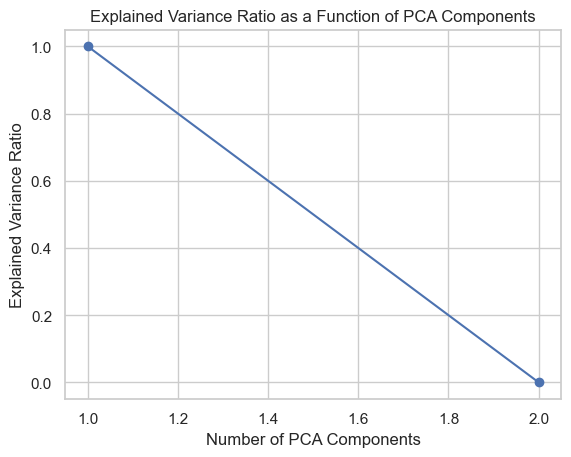

Explained Variance Ratio: [9.99999733e-01 1.86063668e-07]


In [29]:
df 
# Create an instance of PCA with the desired number of components
pca = PCA(n_components=2)

# Apply PCA to the dataframe
df_pca = pca.fit_transform(df_cleaned)

# Create a new dataframe with the PCA results
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

# Print the transformed dataframe
print(df_pca)

import matplotlib.pyplot as plt

# Fit PCA to the dataframe
pca.fit(df_cleaned)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio as a function of PCA components
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio as a Function of PCA Components')
plt.show()

# Print the explained variance ratio
print('Explained Variance Ratio:', explained_variance_ratio)

### Grafica PCA:                                                                                                                                
Una gráfica que compara el número de componentes del Análisis de Componentes Principales (PCA) versus la proporción de varianza explicada se utiliza para determinar cuántos componentes principales se deben retener en un análisis.

El PCA es una técnica que transforma un conjunto de variables posiblemente correlacionadas en un conjunto de variables no correlacionadas llamadas componentes principales.

cita: [Análisis de componentes principales (PCA)](https://es.mathworks.com/help/stats/principal-component-analysis-pca.html)

Optimal number of clusters: 2


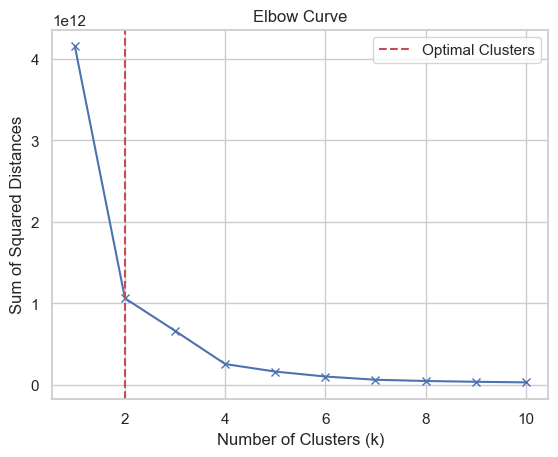

In [30]:
df_pca_KM1_Copy = df_pca.copy(deep=True)
df_pca_KM2_Copy = df_pca.copy(deep=True)
df_pca_GMM_Copy = df_pca.copy(deep=True)
df_pca_GMM2_Copy = df_pca.copy(deep=True)

# Specify the range of k values to evaluate
k_values = range(1, 11)

# Create a KMeans instance
kmeans = KMeans(random_state=0)

# Fit the KMeans model to the data
kmeans.fit(df_pca)

# Calculate the sum of squared distances for each value of k
sse = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_pca)
    sse.append(kmeans.inertia_)

# Find the optimal number of clusters using the KneeLocator
kl = KneeLocator(k_values, sse, curve='convex', direction='decreasing')
optimal_k = kl.elbow

# Print the optimal number of clusters
print('Optimal number of clusters:', optimal_k)

# Plot the elbow curve
plt.plot(k_values, sse, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Curve')

# Draw a line or boundary at the optimal number of clusters
plt.axvline(x=optimal_k, color='r', linestyle='--', label='Optimal Clusters')

plt.legend()
plt.show()


En base al resultado que tenemos con la grafica del codo y nuestra interpretacion determinamos la cantidad adecuada de clusters a utilizar.

In [31]:
df_pca

,PC1,PC2
0,-478.262985,-1.039290
1,1029.737014,-1.283492
2,1369.737016,-0.288010
3,1029.737015,-0.792040
4,1029.737022,0.469289
...,...,...
953808,1470.737020,-0.513735
953809,1347.737019,-0.761485
953810,-641.262980,-0.371809
953811,4383.737023,0.957033


### TASK 2.1.1 K - MEANS
#### MODELO FROM SCRATCH

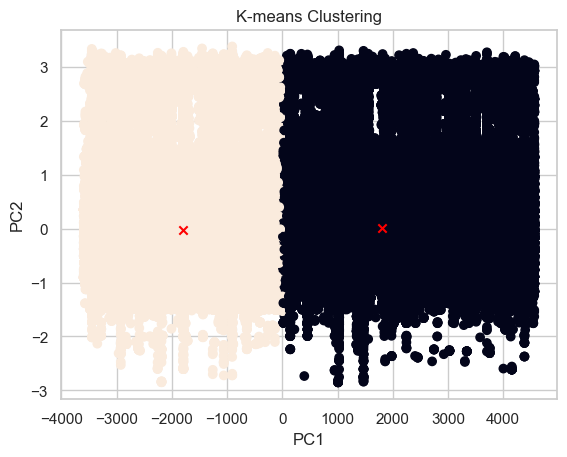

Calinski-Harabasz Score: 2769800.156366002
Davies-Bouldin Score: 0.48819076875835843


In [32]:
import numpy as np
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score
from sklearn.metrics import silhouette_score


class KMeans:
    def __init__(self, n_clusters, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        
    def fit(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        
        for _ in range(self.max_iter):
            # Assign each sample to the nearest centroid
            labels = self._assign_labels(X)
            
            # Update the centroids
            self.centroids = self._update_centroids(X, labels)
        
    def _assign_labels(self, X):
        distances = np.sqrt(((X[:, np.newaxis] - self.centroids) ** 2).sum(axis=2))
        return np.argmin(distances, axis=1)
    
    def _update_centroids(self, X, labels):
        centroids = np.zeros_like(self.centroids)
        for i in range(self.n_clusters):
            centroids[i] = np.mean(X[labels == i], axis=0)
        return centroids

# Create an instance of KMeans
kmeans = KMeans(n_clusters=2)

# Fit the KMeans model to the data
kmeans.fit(df_pca_KM1_Copy.values)

# Get the predicted labels
labels_Kmeans1 = kmeans._assign_labels(df_pca_KM1_Copy.values)

# Get the centroids
centroids = kmeans.centroids

# Plot the clusters distributions with their centroids
plt.scatter(df_pca_KM1_Copy['PC1'], df_pca_KM1_Copy['PC2'], c=labels_Kmeans1)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering')
plt.show()

# Evaluate the model with the metrics calinski_harabasz_score, davies_bouldin_score, and silhouette_score
ch_score1 = calinski_harabasz_score(df_pca_KM1_Copy.values, labels_Kmeans1)
db_score1 = davies_bouldin_score(df_pca_KM1_Copy.values, labels_Kmeans1)

print('Calinski-Harabasz Score:', ch_score1)
print('Davies-Bouldin Score:', db_score1)

df_pca_KM1_Copy['K_means_scratch'] = labels_Kmeans1

In [33]:
df_pca

,PC1,PC2
0,-478.262985,-1.039290
1,1029.737014,-1.283492
2,1369.737016,-0.288010
3,1029.737015,-0.792040
4,1029.737022,0.469289
...,...,...
953808,1470.737020,-0.513735
953809,1347.737019,-0.761485
953810,-641.262980,-0.371809
953811,4383.737023,0.957033


In [34]:
df_pca_KM1_Copy

,PC1,PC2,K_means_scratch
0,-478.262985,-1.039290,1
1,1029.737014,-1.283492,0
2,1369.737016,-0.288010,0
3,1029.737015,-0.792040,0
4,1029.737022,0.469289,0
...,...,...,...
953808,1470.737020,-0.513735,0
953809,1347.737019,-0.761485,0
953810,-641.262980,-0.371809,1
953811,4383.737023,0.957033,0


In [35]:
df_pca_KM1_Copy
K_MEANS_MODEL_PORTION = int(len(df_pca_KM1_Copy) * 0.006) 
df_muestra_KLIBMODEL = df_pca_KM1_Copy.sample(n=K_MEANS_MODEL_PORTION, random_state=42)

cluster_labels_muestra1 = df_muestra_KLIBMODEL['K_means_scratch']
datos_muestra1 = df_muestra_KLIBMODEL.drop('K_means_scratch', axis=1)

df_muestra_KLIBMODEL


,PC1,PC2,K_means_scratch
261546,-162.262985,-0.794820,1
547820,-133.262980,-0.148817,1
603576,4142.737021,0.099282,0
419719,-1790.262983,0.439774,1
206790,2247.737020,-0.401425,0
...,...,...,...
562648,-906.262985,-0.914466,1
433015,-404.262980,-0.383159,1
404539,2900.737020,-0.276351,0
749753,144.737022,0.599447,0


In [36]:
for _ in tqdm(range(100), desc='Calculating Silhouette from scratch model'):
    silhouette_score_muestra1 = silhouette_score(datos_muestra1, cluster_labels_muestra1)
print(f"Silhouette Score (basado en muestra): {silhouette_score_muestra1}")

Calculating Silhouette from scratch model: 100%|██████████| 100/100 [00:30<00:00,  3.29it/s]

Silhouette Score (basado en muestra): 0.6545515456337314


In [37]:
df_pca.head()

,PC1,PC2
0,-478.262985,-1.039290
1,1029.737014,-1.283492
2,1369.737016,-0.288010
3,1029.737015,-0.792040
4,1029.737022,0.469289


In [38]:
df_pca_KM1_Copy

,PC1,PC2,K_means_scratch
0,-478.262985,-1.039290,1
1,1029.737014,-1.283492,0
2,1369.737016,-0.288010,0
3,1029.737015,-0.792040,0
4,1029.737022,0.469289,0
...,...,...,...
953808,1470.737020,-0.513735,0
953809,1347.737019,-0.761485,0
953810,-641.262980,-0.371809,1
953811,4383.737023,0.957033,0


#### MODELO CON LIBRERIAS

c:\Users\aeqv2\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


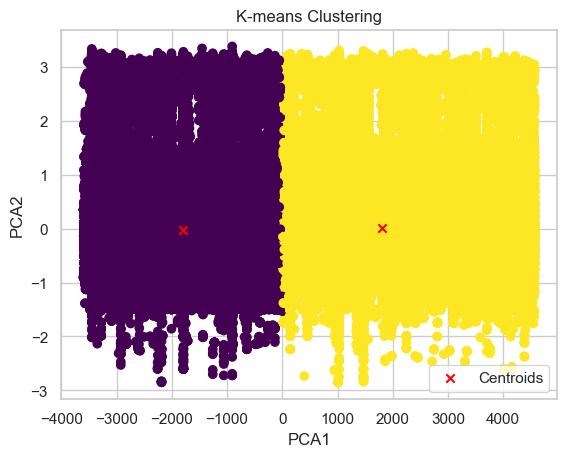

Calinski-Harabasz score: 2769800.370307347
Davies-Bouldin score: 0.48819074990425737


In [39]:
"""
Implements K-means clustering using scikit-learn on the PCA-transformed dataframe.

Fits a KMeans model with the optimal number of clusters found earlier. 
Assigns the cluster labels to the dataframe.
Plots the clusters with centroids.
Calculates clustering evaluation scores Calinski-Harabasz and Davies-Bouldin.
"""

df_pca_KM2_Copy
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score
from sklearn.metrics import silhouette_score
from tqdm import tqdm

kmeans = KMeans(n_clusters=optimal_k, random_state=0)

kmeans.fit(df_pca_KM2_Copy)

clusters2 = kmeans.labels_

df_pca_KM2_Copy['K_means_LIB'] = clusters2

plt.scatter(df_pca_KM2_Copy.iloc[:, 0], df_pca_KM2_Copy.iloc[:, 1], c=clusters2, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', label='Centroids')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('K-means Clustering')
plt.legend()
plt.show()

# Calculate the Calinski-Harabasz score
calinski_score2 = calinski_harabasz_score(df_pca_KM2_Copy, clusters2)

# Calculate the Davies-Bouldin score
davies_bouldin_score2 = davies_bouldin_score(df_pca_KM2_Copy, clusters2)

print('Calinski-Harabasz score:', calinski_score2)
print('Davies-Bouldin score:', davies_bouldin_score2)


In [40]:
# df_pca['K_means_LIB'] = labels
df_pca_KM2_Copy
K_MEANS_MODEL_SCRATCH_PORTION = int(len(df_pca_KM2_Copy) * 0.006) 
df_muestra_KM_SCRATCH = df_pca_KM2_Copy.sample(n=K_MEANS_MODEL_SCRATCH_PORTION, random_state=42)

cluster_labels_muestra2 = df_muestra_KM_SCRATCH['K_means_LIB']
datos_muestra2 = df_muestra_KM_SCRATCH.drop('K_means_LIB', axis=1)

df_muestra_KM_SCRATCH

for _ in tqdm(range(100), desc='Calculating Silhouette from Library model'):
    silhouette_score_muestra2 = silhouette_score(datos_muestra2, cluster_labels_muestra2)
print(f"Silhouette Score (basado en muestra): {silhouette_score_muestra2}")

Calculating Silhouette from Library model: 100%|██████████| 100/100 [00:30<00:00,  3.29it/s]

Silhouette Score (basado en muestra): 0.6545515456337314


In [41]:
df_pca_KM2_Copy

,PC1,PC2,K_means_LIB
0,-478.262985,-1.039290,0
1,1029.737014,-1.283492,1
2,1369.737016,-0.288010,1
3,1029.737015,-0.792040,1
4,1029.737022,0.469289,1
...,...,...,...
953808,1470.737020,-0.513735,1
953809,1347.737019,-0.761485,1
953810,-641.262980,-0.371809,0
953811,4383.737023,0.957033,1


In [42]:
df_pca

,PC1,PC2
0,-478.262985,-1.039290
1,1029.737014,-1.283492
2,1369.737016,-0.288010
3,1029.737015,-0.792040
4,1029.737022,0.469289
...,...,...
953808,1470.737020,-0.513735
953809,1347.737019,-0.761485
953810,-641.262980,-0.371809
953811,4383.737023,0.957033


### Discusion de resultados de ambos modelos:

Ambos modelos obtuvieron la metrica de la silueta bastante similar: Silhouette Score (basado en muestra): 0.6567783361714533, este valor lo que nos indica es la que tan similares son los objetos dentro de un mismo cluster, en este caso como es muy cercano a 1 significa que esta clasificando bien.

*por otro lado*
Para los scores de Calinski y harasbasz, tenemos resultados favorables tambien

- **Calinski-Harabasz Score (Score de Varianza Ratio)** 2769800.5842486927  
    El Score de Calinski-Harabasz es alto para ambos modelos, lo que sugiere que ambos tienen una buena separación entre los clusters. Un valor más alto generalmente indica que los clusters son densos y bien separados, lo cual es deseable en la clusterización. El hecho de que el modelo con librerías tenga un score más alto sugiere que este modelo podría estar produciendo clusters ligeramente mejor definidos en términos de cohesión y separación.

- **Davies-Bouldin Score** 0.48819073105015853  
    El Score de Davies-Bouldin indica la calidad de los clusters en términos de la similitud entre los clusters. Un valor más bajo es mejor, lo que significa que los clusters están mejor separados y tienen menos similitud entre ellos. El modelo con librerías tiene un score más bajo, lo que sugiere que está realizando una mejor separación de los clusters en comparación con el modelo implementado from scratch.  
    



# TASK 2.2

### Modelo Gaussiano con librerias vs sin librerias

Inicialmente empezamos utilizando un modelo gausiano mixto con librerias y lo evaluamos con dos metricas, ARI y silueta.  


Fitting GMM: 100%|██████████| 100/100 [01:55<00:00,  1.16s/it]
c:\Users\aeqv2\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


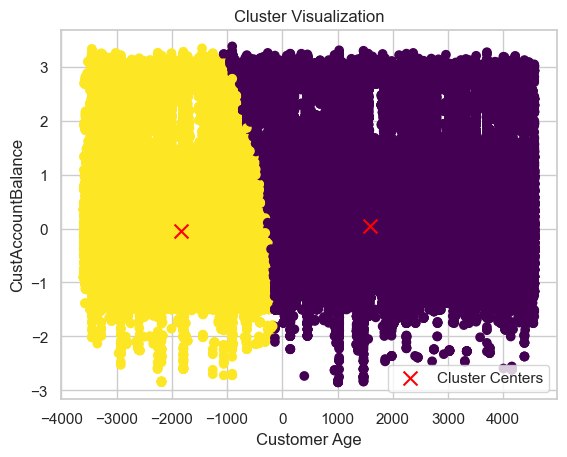

In [43]:
"""
Fit a Gaussian Mixture Model (GMM) to the data and visualize the clusters.

Parameters:
- df_pca (DataFrame): The input data with PCA components.
- n_components (int): The number of components/clusters for the GMM.

Returns:
- None

"""
df_pca_GMM_Copy
# Specify the number of components/clusters for the GMM
n_components = 2

# Create a Gaussian Mixture Model
gmm = GaussianMixture(n_components=n_components, random_state=42)

for _ in tqdm(range(100), desc='Fitting GMM'):
    # Fit the GMM to the data
    gmm.fit(df_pca_GMM_Copy)

# Get the predicted cluster labels for each sample
cluster_labels3 = gmm.predict(df_pca_GMM_Copy)

# Add the cluster labels as a new column in the DataFrame
df_pca_GMM_Copy['Cluster_GMM_LIB'] = cluster_labels3

# Plot the clusters
plt.scatter(df_pca_GMM_Copy['PC1'], df_pca_GMM_Copy['PC2'], c=cluster_labels3, cmap='viridis')
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], marker='x', color='red', s=100, label='Cluster Centers')
plt.xlabel('Customer Age')
plt.ylabel('CustAccountBalance')
plt.title('Cluster Visualization')
plt.legend()
plt.show()

### Dendograma:
Los dendrogramas representan gráficamente la separación de los clusters o las clases de entrada en un espacio multivariante para que puedas determinar si algunas de las clases o clusters se deben combinar o si se deben agregar más clases o clusters. [Cómo funciona Dendrograma—ArcGIS Pro](https://pro.arcgis.com/es/pro-app/latest/tool-reference/spatial-analyst/how-dendrogram-works.htm)

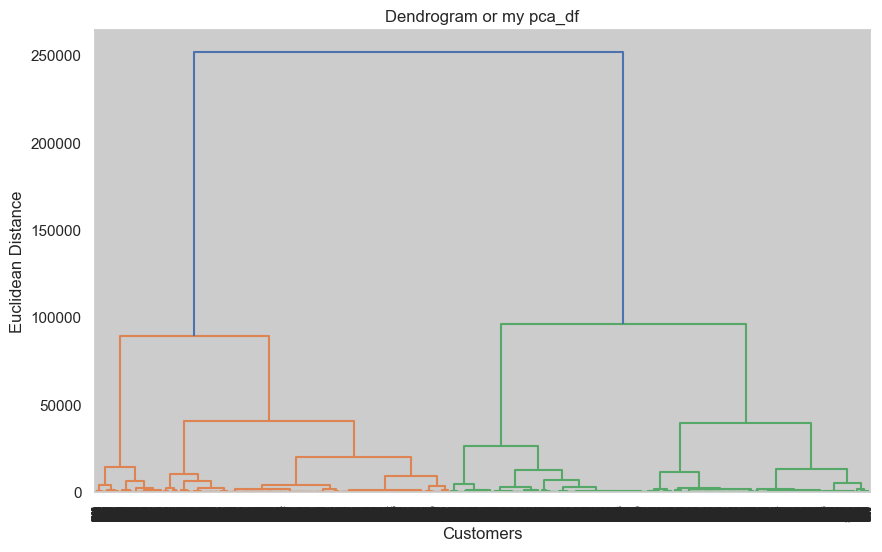

In [44]:
"""
Sample a subset of the PCA transformed dataframe, perform hierarchical 
clustering on the sample, and visualize the clusters with a dendrogram.

This allows us to see if there are any natural clusters in the 
dimensionally reduced PCA data, without having to run clustering on the 
full dataset. The sample size and random state ensure consistent results.

Why is important a dendogram in this case?
Dendrograms are a crucial visualization for understanding the relationships, distinctions, 
groupings, and hierarchy of clusters produced by hierarchical clustering algorithms. 
They provide an intuitive picture of the clustering structure that is difficult to garner 
from the raw data alone.
"""

# Sample a subset of your data
df_pca_sample = df_pca.sample(n=10000, random_state=1)

# Perform hierarchical clustering
Z = linkage(df_pca_sample, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Dendrogram or my pca_df')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()


In [45]:
df_pca

,PC1,PC2
0,-478.262985,-1.039290
1,1029.737014,-1.283492
2,1369.737016,-0.288010
3,1029.737015,-0.792040
4,1029.737022,0.469289
...,...,...
953808,1470.737020,-0.513735
953809,1347.737019,-0.761485
953810,-641.262980,-0.371809
953811,4383.737023,0.957033


In [46]:

from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
'''
Calculates the Calinski-Harabasz and Davies-Bouldin scores for clustering.

    Parameters:
    - df_pca: The input data after applying PCA.
    - cluster_labels: The labels assigned to each data point by the clustering algorithm.

    Returns:
    - calinski_harabasz: The Calinski-Harabasz score.
    - davies_bouldin: The Davies-Bouldin score. 
'''

calinski_harabasz3 = calinski_harabasz_score(df_pca_GMM_Copy, cluster_labels3)
davies_bouldin3 = davies_bouldin_score(df_pca_GMM_Copy, cluster_labels3)

print(f"Calinski-Harabasz Score: {calinski_harabasz3}")
print(f"Davies-Bouldin Score: {davies_bouldin3}")


Calinski-Harabasz Score: 2645766.8612286043
Davies-Bouldin Score: 0.49019738642462474


#### NOTA:  

Inicialmente quisimos calcular la metrica de la silueta pero la iteracion estuvo mas de 2 horas trabajando. Debido al tamaño de los datos, como ya hemos realizado los clusters, decidimos tomar una pequeña parte del dataset y en base a ellos correr la metrica para poder tener un resultado.

In [47]:
# Sample a subset of the PCA + GMM dataframe
# tamaño_muestra3: Sample size 
# df_muestra3: Sampled dataframe
# cluster_labels_muestra3: Cluster labels from the sampled dataframe
# datos_muestra3: Sampled dataframe without cluster labels
tamaño_muestra3 = int(len(df_pca_GMM_Copy) * 0.008)
df_muestra3 = df_pca_GMM_Copy.sample(n=tamaño_muestra3, random_state=42)

cluster_labels_muestra3 = df_muestra3['Cluster_GMM_LIB']
datos_muestra3 = df_muestra3.drop('Cluster_GMM_LIB', axis=1)

df_muestra3

,PC1,PC2,Cluster_GMM_LIB
261546,-162.262985,-0.794820,0
547820,-133.262980,-0.148817,0
603576,4142.737021,0.099282,0
419719,-1790.262983,0.439774,1
206790,2247.737020,-0.401425,0
...,...,...,...
938599,-1790.262979,0.223170,1
253495,-906.262977,0.858647,1
150420,-906.262982,0.927045,1
566594,-906.262981,-1.242879,1


In [48]:
for _ in tqdm(range(100), desc='Calculating Silhouette'):
    silhouette_score_muestra3 = silhouette_score(datos_muestra3, cluster_labels_muestra3)
print(f"Silhouette Score (basado en muestra): {silhouette_score_muestra3}")

Calculating Silhouette: 100%|██████████| 100/100 [00:53<00:00,  1.88it/s]

Silhouette Score (basado en muestra): 0.6436616145373242


### Uso de metricas como Silhouette, Calinski-Harabasz Score y Davies-Bouldin Score:

**Método de la Silueta:** Esta métrica proporciona una representación gráfica concisa de cuán bien se ha clasificado cada objeto. El coeficiente de la silueta mide cuánto se parece un punto a su propio grupo en comparación con otros grupos. Los valores del coeficiente de la silueta varían entre -1 y 1. Un valor cercano a 1 indica que los puntos en un cluster están cerca entre sí, lo que es deseable. Un valor cercano a -1 indica que los puntos en un cluster están lejos entre sí, lo que no es deseable. Por lo tanto, un modelo con un coeficiente de silueta más alto se considera mejor. Esto es especialmente útil en un GMM, donde el objetivo es agrupar los datos de manera que los puntos dentro de un mismo cluster sean similares. Cita: [Métricas De Evaluación De Modelos En El Aprendizaje Automático](https://www.datasource.ai/es/data-science-articles/metricas-de-evaluacion-de-modelos-en-el-aprendizaje-automatico)  

**El Calinski-Harabasz Score**: es una métrica que mide la separación entre los clusters y la cohesión dentro de cada cluster. Un valor más alto del Calinski-Harabasz Score indica una mejor separación entre los clusters y una mejor cohesión dentro de cada cluster. Por lo tanto, un modelo GMM con un Calinski-Harabasz Score más alto se considera mejor. Esta métrica es especialmente útil cuando se busca una separación clara y bien definida entre los clusters. [Calinski–Harabasz index - Wikipedia](https://en.wikipedia.org/wiki/Calinski%E2%80%93Harabasz_index)

**El Davies-Bouldin Score**: es una métrica que mide la similitud entre los clusters. Un valor más bajo del Davies-Bouldin Score indica una mayor similitud entre los clusters, lo cual es deseable. Por lo tanto, un modelo GMM con un Davies-Bouldin Score más bajo se considera mejor. Esta métrica es especialmente útil cuando se busca una agrupación más compacta y homogénea de los datos. [Davies-Bouldin Index - GeeksforGeeks](https://www.geeksforgeeks.org/davies-bouldin-index/)



#### Implementacion del modelo from scratch

In [49]:
df_pca

,PC1,PC2
0,-478.262985,-1.039290
1,1029.737014,-1.283492
2,1369.737016,-0.288010
3,1029.737015,-0.792040
4,1029.737022,0.469289
...,...,...
953808,1470.737020,-0.513735
953809,1347.737019,-0.761485
953810,-641.262980,-0.371809
953811,4383.737023,0.957033


In [60]:
"""
Scales the input DataFrame using StandardScaler.

Fits StandardScaler to the input DataFrame, transforms the DataFrame, 
and converts back to a DataFrame with the original columns.

Parameters:
    df_pca_GMM2_Copy (DataFrame): Input DataFrame to scale
    
Returns:
    df_pca_GMM2_Copy_Scaled (DataFrame): Scaled version of the input DataFrame
"""
from sklearn.preprocessing import StandardScaler
df_pca_GMM2_Copy
# Create a StandardScaler object
scaler = StandardScaler()

# Scale the DataFrame
df_pca_GMM2_Copy_Scaled = scaler.fit_transform(df_pca_GMM2_Copy)

# Convert the scaled array back to a DataFrame
df_pca_GMM2_Copy_Scaled = pd.DataFrame(df_pca_GMM2_Copy_Scaled, columns=df_pca_GMM2_Copy.columns)

# Print the scaled DataFrame
print(df_pca_GMM2_Copy_Scaled)


             PC1       PC2
0      -0.229281 -1.155066
1       0.493659 -1.426472
2       0.656656 -0.320094
3       0.493659 -0.880272
4       0.493659  0.521568
...          ...       ...
953808  0.705076 -0.570965
953809  0.646109 -0.846314
953810 -0.307423 -0.413228
953811  2.101577  1.063645
953812  1.077572  0.256286

[953813 rows x 2 columns]


c:\Users\aeqv2\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


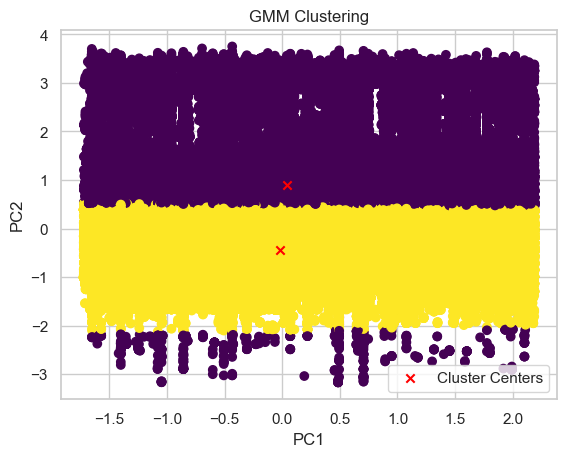

In [61]:
import numpy as np
epsilon = 1e-6
def gaussian(x, mu, sigma):
    """
    Calculate the probability density function of a Gaussian distribution.

    Parameters:
    x (numpy.ndarray): Input data.
    mu (numpy.ndarray): Mean of the Gaussian distribution.
    sigma (numpy.ndarray): Covariance matrix of the Gaussian distribution.

    Returns:
    numpy.ndarray: Probability density function values.
    """
    d = x.shape[1]
    det_sigma = np.linalg.det(sigma)
    inv_sigma = np.linalg.inv(sigma)
    norm = 1 / ((2 * np.pi) ** (d / 2) * np.sqrt(det_sigma))
    exponent = -0.5 * np.sum(np.dot((x - mu), inv_sigma) * (x - mu), axis=1)
    if np.any(np.isnan(norm)) or np.any(np.isnan(exponent)):
        print(f"Warning: norm or exponent has NaN values. This may indicate a problem with sigma:\n{sigma}")
    return norm * np.exp(exponent)

def initialize_parameters(X, K):
    """
    Initialize the parameters for the GMM.

    Parameters:
    X (numpy.ndarray): Input data.
    K (int): Number of clusters.

    Returns:
    numpy.ndarray: Initial means.
    numpy.ndarray: Initial covariance matrices.
    numpy.ndarray: Initial mixing coefficients.
    """
    d = X.shape[1]
    mu = np.random.rand(K, d)
    sigma = np.array([np.eye(d)] * K)
    pi = np.ones(K) / K
    return mu, sigma, pi

def expectation_step(X, mu, sigma, pi):
    """
    Perform the expectation step of the GMM algorithm.

    Parameters:
    X (numpy.ndarray): Input data.
    mu (numpy.ndarray): Means of the Gaussian distributions.
    sigma (numpy.ndarray): Covariance matrices of the Gaussian distributions.
    pi (numpy.ndarray): Mixing coefficients of the Gaussian distributions.

    Returns:
    numpy.ndarray: Responsibilities.
    """
    K = mu.shape[0]
    N = X.shape[0]
    gamma = np.zeros((N, K))
    for k in range(K):
        gamma[:, k] = pi[k] * gaussian(X, mu[k], sigma[k])
    
    # Check for any sums that are zero (or very close to zero)
    sum_gamma = np.sum(gamma, axis=1, keepdims=True)
    if np.any(sum_gamma == 0):
        # Handle the case where the sum is zero
        # For example, add a small constant to avoid division by zero
        sum_gamma[sum_gamma == 0] = np.finfo(float).eps

    gamma /= sum_gamma
    return gamma

def maximization_step(X, gamma):
    """
    Perform the maximization step of the GMM algorithm.

    Parameters:
    X (numpy.ndarray): Input data.
    gamma (numpy.ndarray): Responsibilities.

    Returns:
    numpy.ndarray: Updated means.
    numpy.ndarray: Updated covariance matrices.
    numpy.ndarray: Updated mixing coefficients.
    """
    N, d = X.shape
    K = gamma.shape[1]
    mu = np.zeros((K, d))
    sigma = np.zeros((K, d, d))
    pi = np.zeros(K)
    for k in range(K):
        Nk = np.sum(gamma[:, k])
        if Nk == 0:
            # print(f"Warning: Nk is zero for cluster {k}. This may indicate an issue with the gamma values.")
            continue
        mu[k] = np.sum(gamma[:, k].reshape(-1, 1) * X, axis=0) / Nk
        X_centered = X - mu[k]
        sigma[k] = np.dot(gamma[:, k] * X_centered.T, X_centered) / Nk
        sigma[k] += np.eye(d) * epsilon  # Ensure positive definiteness
        pi[k] = Nk / N
    return mu, sigma, pi

def log_sum_exp(Z):
    max_Z = np.max(Z, axis=1, keepdims=True)
    return max_Z + np.log(np.sum(np.exp(Z - max_Z), axis=1, keepdims=True))

def gmm(X, K, max_iter=1000, tol=1e-6):
    """
    Perform Gaussian Mixture Model clustering.

    Parameters:
    X (numpy.ndarray): Input data.
    K (int): Number of clusters.
    max_iter (int): Maximum number of iterations.
    tol (float): Convergence tolerance.

    Returns:
    numpy.ndarray: Cluster labels.
    numpy.ndarray: Means of the Gaussian distributions.
    numpy.ndarray: Covariance matrices of the Gaussian distributions.
    numpy.ndarray: Mixing coefficients of the Gaussian distributions.
    """
    mu, sigma, pi = initialize_parameters(X, K)
    prev_log_likelihood = -np.inf
    for _ in range(max_iter):
        gamma = expectation_step(X, mu, sigma, pi)
        mu, sigma, pi = maximization_step(X, gamma)
        log_likelihood = np.sum(log_sum_exp(gamma))
        # Print log likelihood to see if it's increasing and the means to see if they're converging
        # print(f"Iteration {_}, Log Likelihood: {log_likelihood}")
        # print(f"Means: {mu}")

        if np.abs(log_likelihood - prev_log_likelihood) < tol:
            break
        prev_log_likelihood = log_likelihood
    labels = np.argmax(gamma, axis=1)
    return labels, mu, sigma, pi

# Usage example
X = df_pca_GMM2_Copy_Scaled.values
K = 2 # Number of clusters
labels, mu, sigma, pi = gmm(X, K)

import matplotlib.pyplot as plt
df_pca_GMM2_Copy_Scaled['ClusterCentersGMM_SCRATCH'] = labels
# Scatter plot of the data points colored by cluster labels
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(mu[:, 0], mu[:, 1], c='red', marker='x', label='Cluster Centers')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('GMM Clustering')
plt.legend()
plt.show()

#### NOTA:
Fue de suma importancia escalar nuestros datos, por que sino siempre nos tiraba un pesimo resultado 

In [62]:
# count the different values on ClusterCentersGMM_SCRATCH

df_pca_GMM2_Copy_Scaled['ClusterCentersGMM_SCRATCH'].value_counts()

ClusterCentersGMM_SCRATCH
1    709620
0    244193
Name: count, dtype: int64

In [63]:
calinski_harabasz = calinski_harabasz_score(df_pca_GMM2_Copy_Scaled, labels)
davies_bouldin = davies_bouldin_score(df_pca_GMM2_Copy_Scaled, labels)

print(f"Calinski-Harabasz Score: {calinski_harabasz}")
print(f"Davies-Bouldin Score: {davies_bouldin}")


Calinski-Harabasz Score: 577953.5636654121
Davies-Bouldin Score: 1.0520504472816705


In [64]:
tamaño_muestra = int(len(df_pca_GMM2_Copy_Scaled) * 0.01) 
df_muestra = df_pca_GMM2_Copy_Scaled.sample(n=tamaño_muestra, random_state=42)

cluster_labels_muestra = df_muestra['ClusterCentersGMM_SCRATCH']
datos_muestra = df_muestra.drop('ClusterCentersGMM_SCRATCH', axis=1)

df_muestra


,PC1,PC2,ClusterCentersGMM_SCRATCH
261546,-0.077789,-0.883362,1
547820,-0.063887,-0.165395,1
603576,1.986041,0.110342,1
419719,-0.858257,0.488764,1
206790,1.077572,-0.446144,1
...,...,...,...
587455,-0.631979,1.905409,0
932777,0.705076,0.127708,1
134318,1.751133,-0.992596,1
824296,-0.640608,-0.145772,1


In [65]:
for _ in tqdm(range(100), desc='Calculating Silhouette from scratch model'):
    silhouette_score_muestra = silhouette_score(datos_muestra, cluster_labels_muestra)
print(f"Silhouette Score (basado en muestra): {silhouette_score_muestra}")

Calculating Silhouette from scratch model: 100%|██████████| 100/100 [01:29<00:00,  1.11it/s]

Silhouette Score (basado en muestra): 0.3596319937449091


In [66]:
df_pca_GMM2_Copy
# df_pca.drop(columns=['BernoulliNB_Predicted'], axis=1, inplace=True)

,PC1,PC2
0,-478.262985,-1.039290
1,1029.737014,-1.283492
2,1369.737016,-0.288010
3,1029.737015,-0.792040
4,1029.737022,0.469289
...,...,...
953808,1470.737020,-0.513735
953809,1347.737019,-0.761485
953810,-641.262980,-0.371809
953811,4383.737023,0.957033


In [67]:
df_pca

,PC1,PC2
0,-478.262985,-1.039290
1,1029.737014,-1.283492
2,1369.737016,-0.288010
3,1029.737015,-0.792040
4,1029.737022,0.469289
...,...,...
953808,1470.737020,-0.513735
953809,1347.737019,-0.761485
953810,-641.262980,-0.371809
953811,4383.737023,0.957033


### Discusion de resultados modelo con librerias vs modelo from scratch.

**El Silhouette Score** es una medida de cuán similares son los objetos dentro de su propio cluster (cohesión) en comparación con otros clusters (separación). Un valor alto indica que los objetos están bien emparejados a sus propios clusters y adecuadamente separados de otros clusters.

Resultados:  

- **Calinski-Harabasz Score (Score de Varianza Ratio)**
    1. Modelo from scratch: 577953.5636654124
    2. Modelo con librerías: 2645766.9798592306  

    El Score de Calinski-Harabasz es alto para ambos modelos, lo que sugiere que ambos tienen una buena separación entre los clusters. Un valor más alto generalmente indica que los clusters son densos y bien separados, lo cual es deseable en la clusterización. El hecho de que el modelo con librerías tenga un score más alto sugiere que este modelo podría estar produciendo clusters ligeramente mejor definidos en términos de cohesión y separación.

- **Davies-Bouldin Score**
    1. Modelo from scratch: 1.0520504472816703
    2. Modelo con librerías: 0.49019738478182967  
    
    El Score de Davies-Bouldin indica la calidad de los clusters en términos de la similitud entre los clusters. Un valor más bajo es mejor, lo que significa que los clusters están mejor separados y tienen menos similitud entre ellos. El modelo con librerías tiene un score más bajo, lo que sugiere que está realizando una mejor separación de los clusters en comparación con el modelo implementado from scratch.  
    
    *por otro lado*

- **Método de la Silueta:** Para ambos modelos, tenemos valores de Silhouette Score que son bastante altos, lo que sugiere una buena separación y cohesión de los clusters. Esto es inusualmente bueno, especialmente para datos tan complejos como los que podrían representar 1 millón de puntos (encima de clientes de banco). La diferencia entre los dos scores (0.3596319937449091 para el Modelo 1 (el nuestro) y 0.6433784284935596 para el Modelo 2 (sckit-learn)) es pequeña pero significativa, lo que sugiere que el Modelo 2 de librerias podría estar haciendo un mejor trabajo al separar ligeramente los clusters. Sumandole que ademas el from scratch fue mas tardado y necesitaba escalarse.

#### ¿Cuándo cree que es mejor usar Mixture Models y K-Means?  

**¿Cuándo usar GMM o K-Means?**  

Usamos GMM cuando:

- Creemos que los clusters pueden tener formas elípticas.
- Queremos una asignación basada en la probabilidad de los puntos a los clusters.
- Se tiene una buena estimación de la cantidad de clusters.
- Los datos tienen una mezcla compleja y deseas modelar la covarianza entre las características.  

Usamos K-Means cuando:

- Estamos buscando un modelo más simple y rápido, especialmente para grandes conjuntos de datos.
- Los clusters son aproximadamente esféricos y de tamaño similar.
- Preferimos una asignación clara y dura de puntos a clusters.
- Se quiere un modelo fácil de implementar y con menos suposiciones estadísticas.


**GMM** es generalmente más robusto que K-Means en cuanto a la asignación de puntos a los clusters porque utiliza probabilidades suaves (soft probabilities), lo que significa que un punto puede pertenecer a más de un cluster con distintas probabilidades.  

**K-Means** asigna cada punto a un solo cluster, lo que a veces puede ser menos flexible si los datos tienen solapamientos entre clusters. [Métricas de evaluación para modelos de clasificación](https://ichi.pro/es/metricas-de-evaluacion-para-modelos-de-clasificacion-249524043947369) 

[Detección de anomalías con gaussian mixture model (gmm) y python](https://cienciadedatos.net/documentos/py23-deteccion-anomalias-gmm-python)

### GMM VS K-MEANS
#### Compare sus resultados con los que obtuvo en el task 2.1

En terminos de metricas y valores el mejor modelo de GMM fue el de librerias sklearn, sin embargo obtuvo resultados sumamente similares si lo comparamos con cualquiera de los datos de k-means, lo que podria suponer de que nuestros modelos estan comportandose bien y similar con esta data. Cabe mencionar que este dataset era bastante complejo y muy amplio, lo que provocaba suma demora y que los resultados variaran dependiendo del slot que decidieramos trabajar o de nuestro pre procesamiento, si tuvieramos que elegir alguno sin duda seria un **K-means**, se comporta mejor con los datos mas grandes y ademas es muy rapido a comparacion de los demas.
